In [53]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [54]:
# Loading Data
black = pd.read_csv(r"C:\Users\KHALEELBASHA\Desktop\amazon\blackfriday\Black-Friday-Sales-Prediction-master\Black-Friday-Sales-Prediction-master\Data\BlackFridaySales.csv")

In [55]:
black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [75]:
black.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_log
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370,9.032529
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200,9.629116
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422,7.260523
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057,6.964136
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969,8.983440


In [57]:
black.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [58]:
black.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [59]:
black['Product_Category_2'].fillna(black['Product_Category_2'].mean(), inplace=True)
black['Product_Category_3'].fillna(black['Product_Category_3'].mean(), inplace=True)

In [60]:
black.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# EDA

C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_2400\306789567.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(black["Purchase"], color='r')


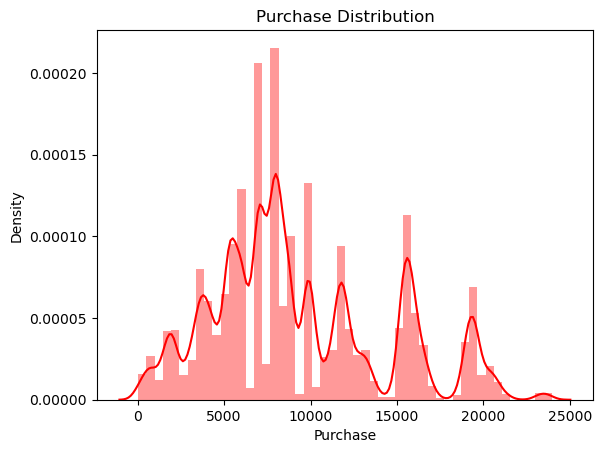

In [61]:
## Target Variable Purchase
sns.distplot(black["Purchase"], color='r')
plt.title("Purchase Distribution")
plt.show()

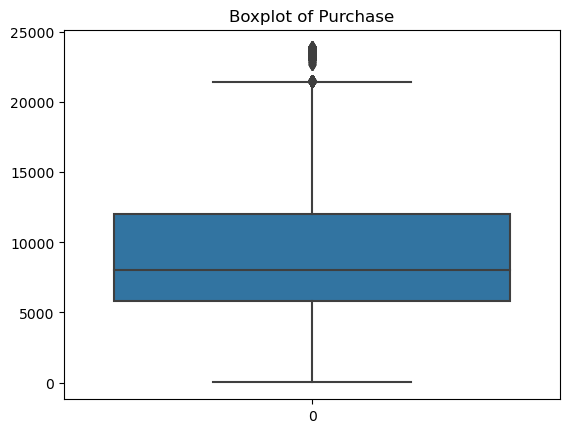

In [62]:
# Observing purchase amount distribution
sns.boxplot(black["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [63]:
# Skewness and Kurtosis of Purchase
print("Skewness of Purchase:", black["Purchase"].skew())
print("Kurtosis of Purchase:", black["Purchase"].kurtosis())

Skewness of Purchase: 0.6001400037087128
Kurtosis of Purchase: -0.3383775655851702


In [64]:
# Descriptive statistics of Purchase
print("Descriptive Statistics of Purchase:\n", black["Purchase"].describe())

Descriptive Statistics of Purchase:
 count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64


C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_2400\623336020.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(black["Purchase_log"], color='b')


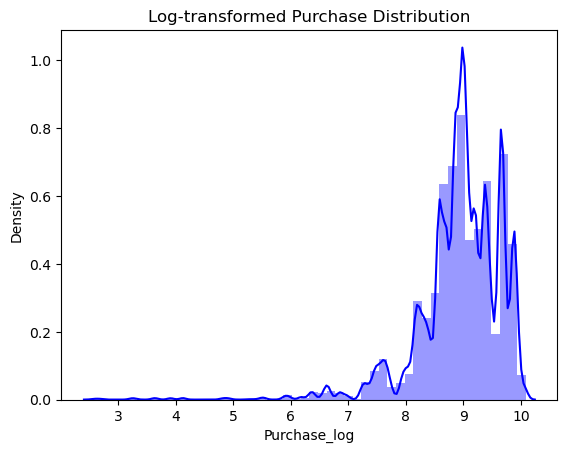

In [65]:
# Log transformation of Purchase
black["Purchase_log"] = np.log1p(black["Purchase"])
sns.distplot(black["Purchase_log"], color='b')
plt.title("Log-transformed Purchase Distribution")
plt.show()

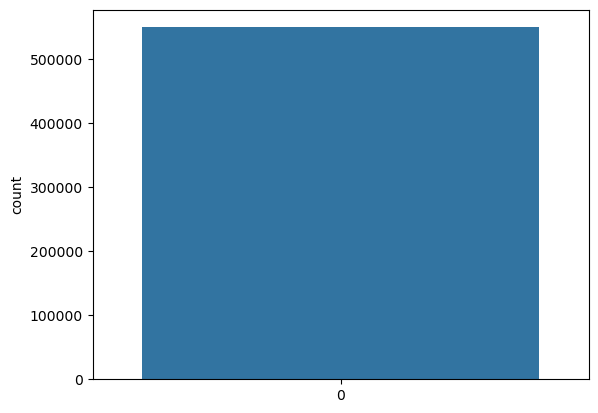

In [66]:
### Marital Status
sns.countplot(black['Marital_Status'])
plt.show()

In [76]:
print("Mean Purchase Amount by Marital Status:\n", black.groupby("Marital_Status").mean()["Purchase"])

Mean Purchase Amount by Marital Status:
 Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64


C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_2400\1218067779.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("Mean Purchase Amount by Marital Status:\n", black.groupby("Marital_Status").mean()["Purchase"])


C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_2400\2560923913.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  black.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')


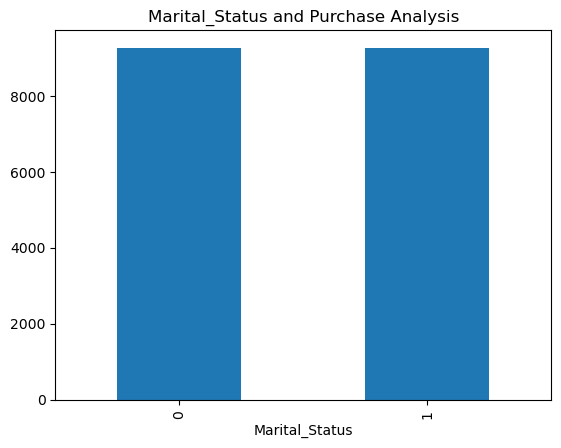

In [78]:
black.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

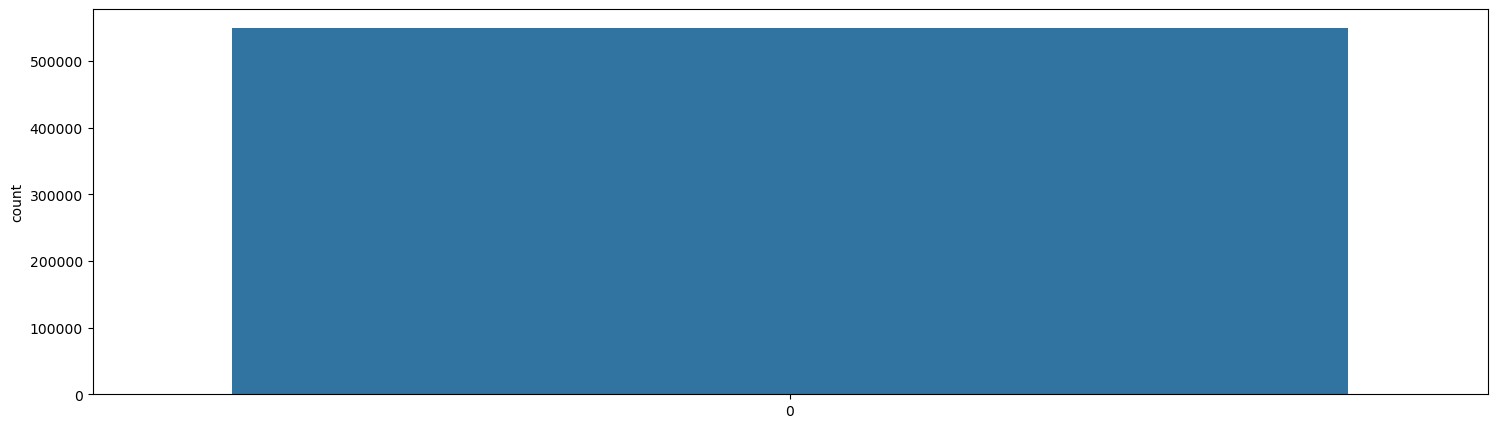

In [79]:
### Occupation
plt.figure(figsize=(18, 5))
sns.countplot(black['Occupation'])
plt.show()

In [80]:
occup = pd.DataFrame(black.groupby("Occupation").mean()["Purchase"])
occup

C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_2400\2867641875.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  occup = pd.DataFrame(black.groupby("Occupation").mean()["Purchase"])


,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


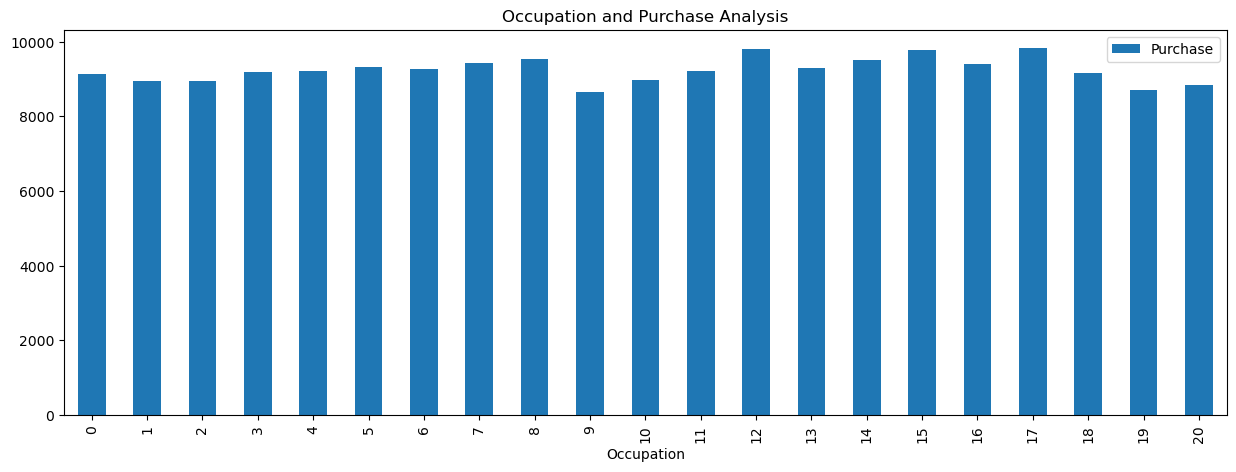

In [81]:
occup.plot(kind='bar', figsize=(15, 5))
plt.title("Occupation and Purchase Analysis")
plt.show()

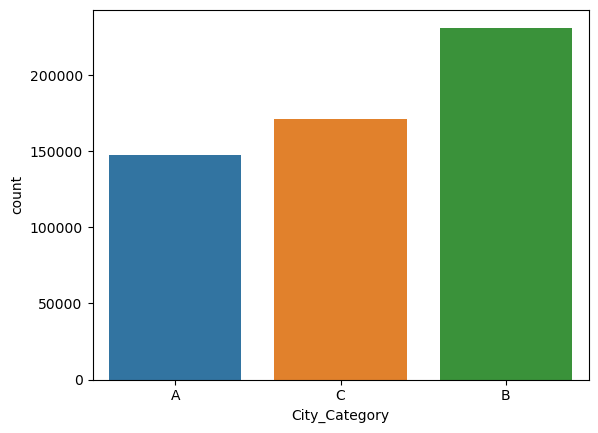

Mean Purchase Amount by City Category:
 City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64


C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_2400\272868016.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("Mean Purchase Amount by City Category:\n", black.groupby("City_Category").mean()["Purchase"])


In [83]:
### City_Category
sns.countplot(x='City_Category', data=black)
plt.show()

print("Mean Purchase Amount by City Category:\n", black.groupby("City_Category").mean()["Purchase"])


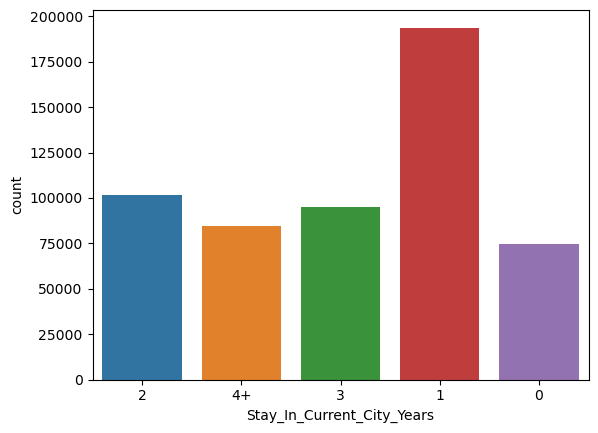

Mean Purchase Amount by Stay_In_Current_City_Years:
 Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64


C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_2400\590636593.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("Mean Purchase Amount by Stay_In_Current_City_Years:\n", black.groupby("Stay_In_Current_City_Years").mean()["Purchase"])


In [85]:
### Stay_In_Current_City_Years
sns.countplot(x='Stay_In_Current_City_Years', data=black)
plt.show()

print("Mean Purchase Amount by Stay_In_Current_City_Years:\n", black.groupby("Stay_In_Current_City_Years").mean()["Purchase"])


In [86]:
black['Stay_In_Current_City_Years'] = black['Stay_In_Current_City_Years'].replace('4+', 4)
black['Stay_In_Current_City_Years'] = black['Stay_In_Current_City_Years'].astype(int)

In [116]:
# Display column names
print(black.columns)


Index(['Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'Purchase_log', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4'],
      dtype='object')


In [117]:
print("Mean Purchase Amount by Stay_In_Current_City_Years:\n", black.groupby("Stay_In_Current_City_Years_0").mean()["Purchase"])

Mean Purchase Amount by Stay_In_Current_City_Years:
 Stay_In_Current_City_Years_0
0    9277.090237
1    9180.075123
Name: Purchase, dtype: float64


<Axes: xlabel='Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4'>

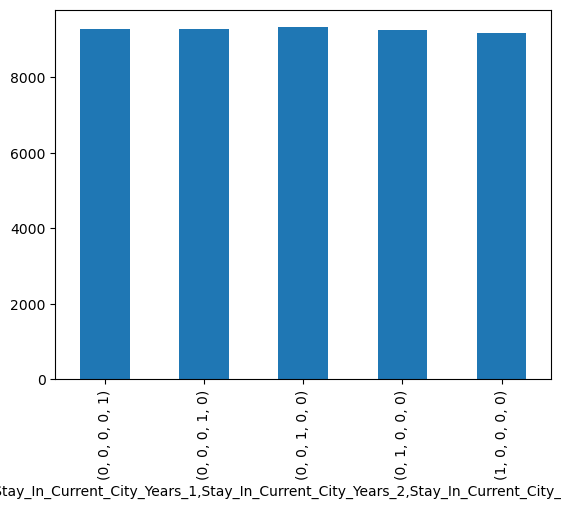

In [119]:
stay_years_cols = ['Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4']
black.groupby(stay_years_cols).mean()["Purchase"].plot(kind='bar')


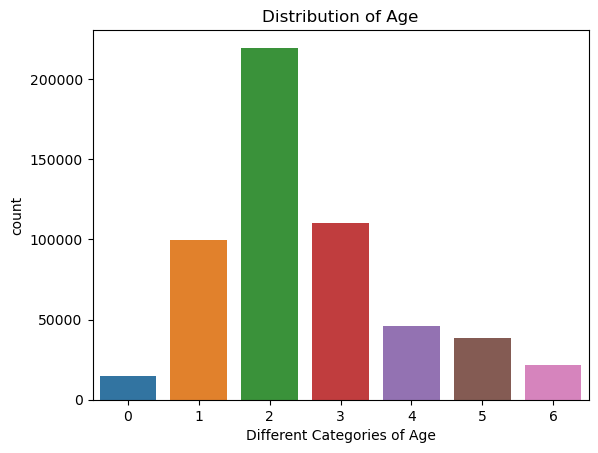

In [120]:
### Age
sns.countplot(x='Age', data=black)
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

In [121]:
print("Mean Purchase Amount by Age:\n", black.groupby("Age").mean()["Purchase"])

Mean Purchase Amount by Age:
 Age
0    8933.464640
1    9169.663606
2    9252.690633
3    9331.350695
4    9208.625697
5    9534.808031
6    9336.280459
Name: Purchase, dtype: float64


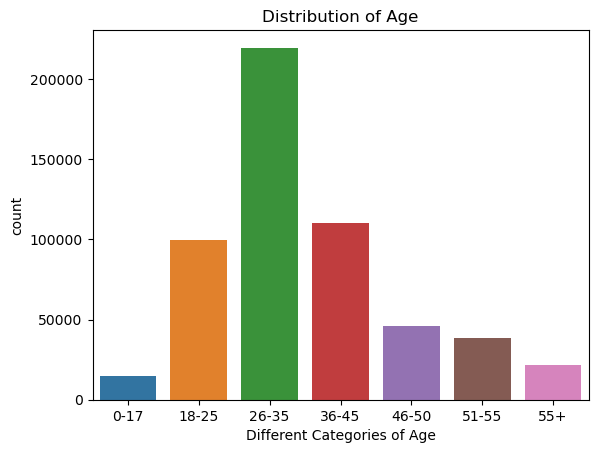

In [90]:
order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sns.countplot(x='Age', data=black, order=order)
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()


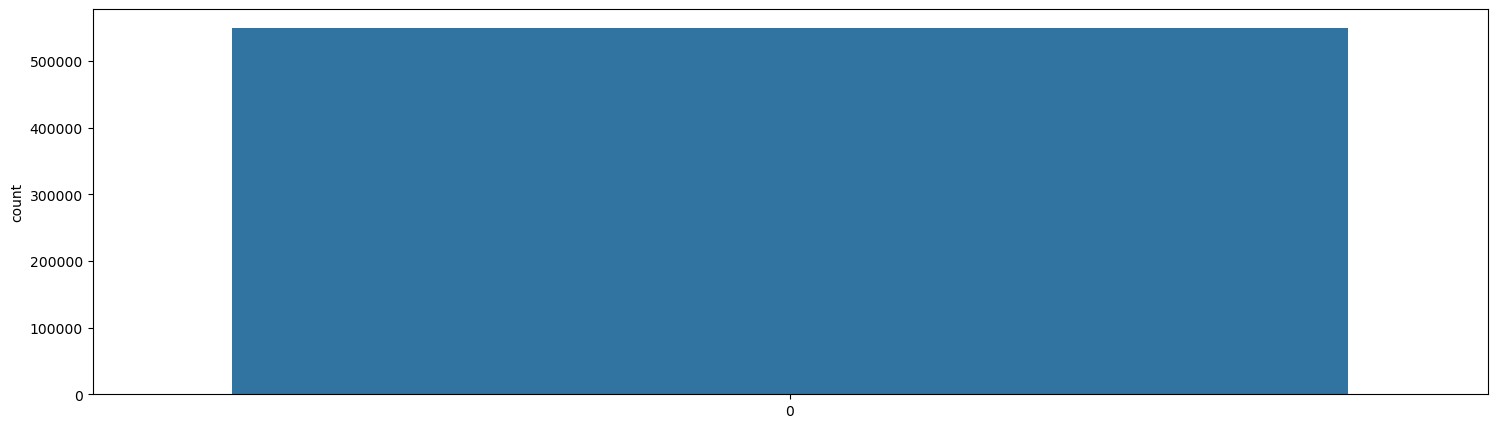

In [94]:
### Product_Category_1
plt.figure(figsize=(18, 5))
sns.countplot(black['Product_Category_1'])
plt.show()

In [95]:
print("Mean Purchase Amount by Product_Category_1:\n", black.groupby('Product_Category_1').mean()['Purchase'])

Mean Purchase Amount by Product_Category_1:
 Product_Category_1
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64


C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_2400\3140813924.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("Mean Purchase Amount by Product_Category_1:\n", black.groupby('Product_Category_1').mean()['Purchase'])


C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_2400\3592371287.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  black.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar', figsize=(18, 5))


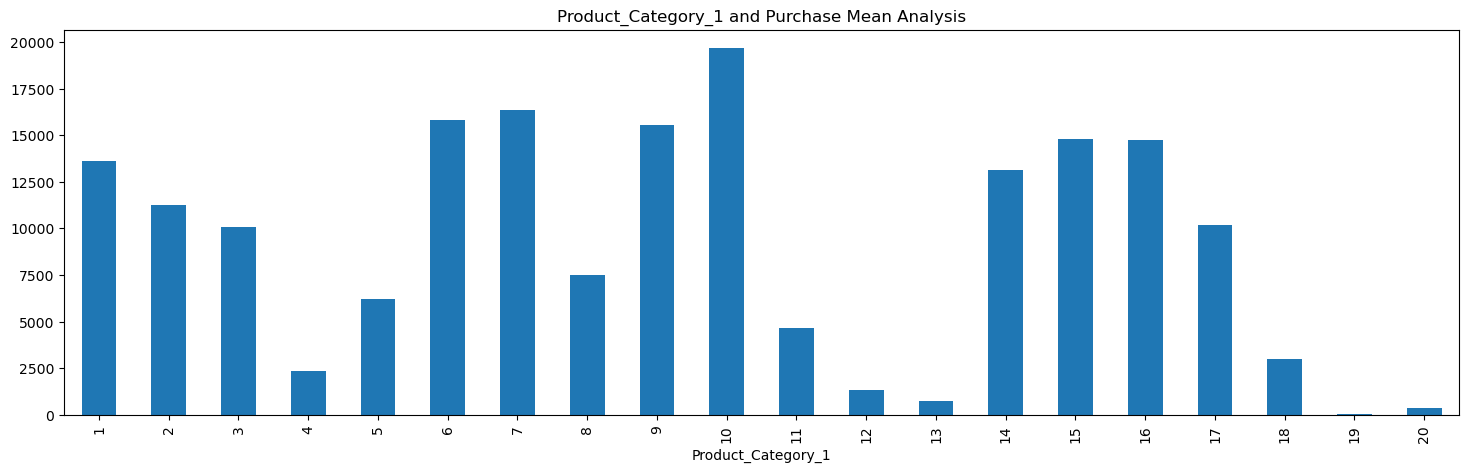

In [93]:
black.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar', figsize=(18, 5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

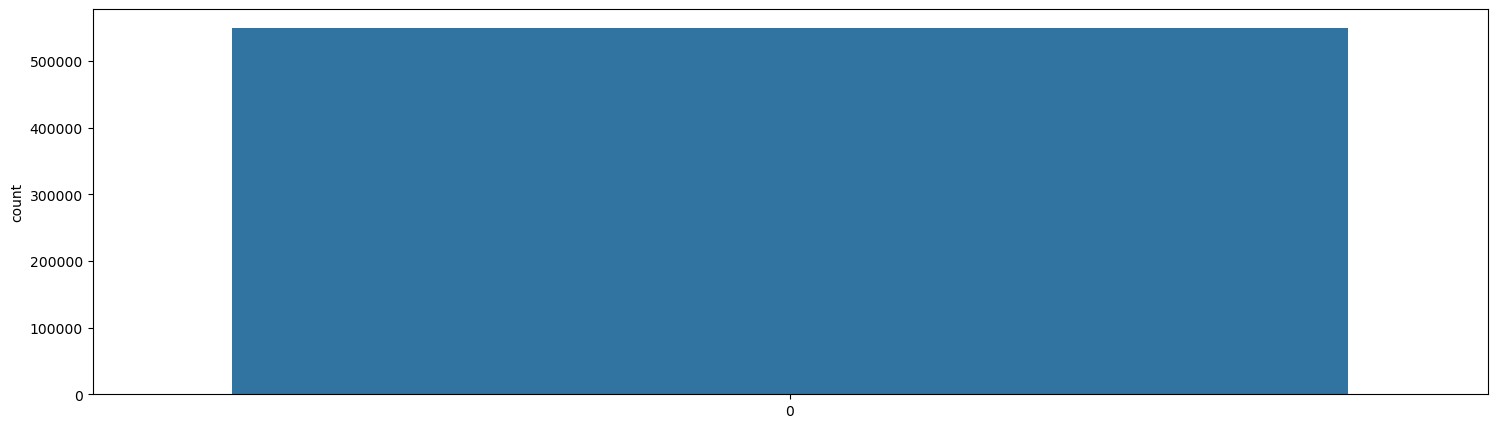

In [97]:
### Product_Category_2
plt.figure(figsize=(18, 5))
sns.countplot(black['Product_Category_2'])
plt.show()

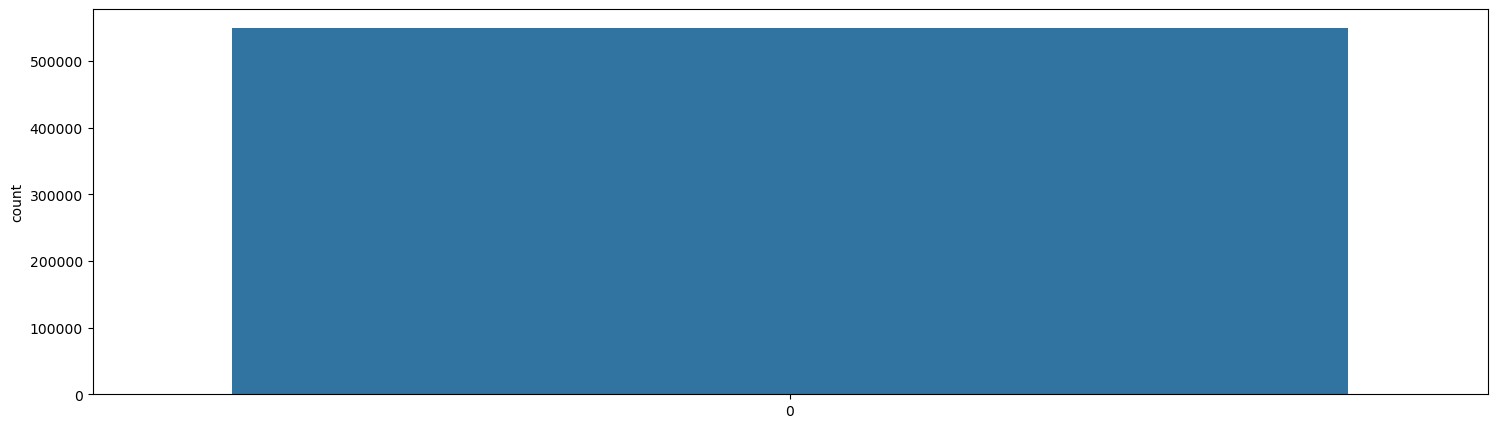

In [98]:
### Product_Category_3
plt.figure(figsize=(18, 5))
sns.countplot(black['Product_Category_3'])
plt.show()

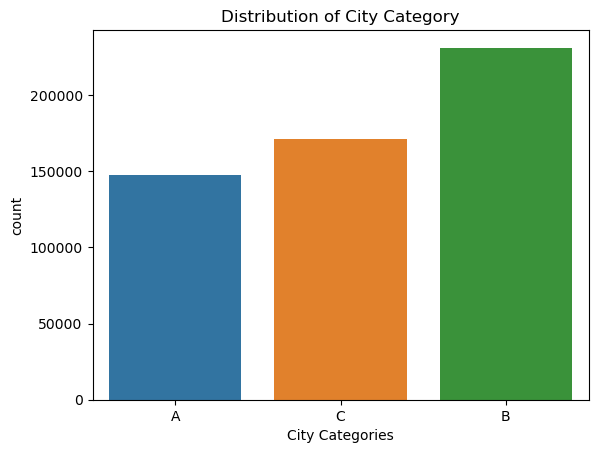

In [100]:
### City_Category
sns.countplot(x='City_Category', data=black)
plt.title('Distribution of City Category')
plt.xlabel('City Categories')
plt.show()

In [101]:
print("Mean Purchase Amount by City Category:\n", black.groupby("City_Category").mean()["Purchase"])

Mean Purchase Amount by City Category:
 City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64


C:\Users\KHALEELBASHA\AppData\Local\Temp\ipykernel_2400\3504983708.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("Mean Purchase Amount by City Category:\n", black.groupby("City_Category").mean()["Purchase"])


In [102]:
# Feature Engineering
black = black.copy()
black = pd.get_dummies(black, columns=['Stay_In_Current_City_Years'])

In [103]:
# Encoding Categorical Variables
lr = LabelEncoder()
black['Gender'] = lr.fit_transform(black['Gender'])
black['Age'] = lr.fit_transform(black['Age'])
black['City_Category'] = lr.fit_transform(black['City_Category'])

In [104]:
# Dropping Irrelevant Columns
black = black.drop(["User_ID", "Product_ID"], axis=1)

In [105]:
# Splitting Data
X = black.drop("Purchase", axis=1)
y = black['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [106]:
# Modeling - Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [107]:
# Model Evaluation - Linear Regression
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R-squared:", r2_score(y_test, y_pred_lr))

Linear Regression Metrics:
MAE: 1846.9829957890604
MSE: 6367058.814189751
RMSE: 2523.3031554273757
R-squared: 0.7476515502319216


In [108]:
# Modeling - Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred_dt = regressor.predict(X_test)

In [109]:
# Model Evaluation - Decision Tree Regressor
print("\nDecision Tree Regressor Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R-squared:", r2_score(y_test, y_pred_dt))


Decision Tree Regressor Metrics:
MAE: 0.020209549087691868
MSE: 0.08255312960168706
RMSE: 0.287320604206672
R-squared: 0.9999999967281354


In [110]:
# Modeling - Random Forest Regressor
RFregressor = RandomForestRegressor(random_state=0)
RFregressor.fit(X_train, y_train)
y_pred_rf = RFregressor.predict(X_test)

In [111]:
# Model Evaluation - Random Forest Regressor
print("\nRandom Forest Regressor Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R-squared:", r2_score(y_test, y_pred_rf))


Random Forest Regressor Metrics:
MAE: 0.01592294314056956
MSE: 0.03487899843050277
RMSE: 0.18675919905188812
R-squared: 0.9999999986176252


In [112]:
# Modeling - XGBoost Regressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

In [113]:
# Model Evaluation - XGBoost Regressor
print("\nXGBoost Regressor Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R-squared:", r2_score(y_test, y_pred_xgb))


XGBoost Regressor Metrics:
MAE: 2.400131018011907
MSE: 21.532776597296337
RMSE: 4.640342293117646
R-squared: 0.9999991465819694
